In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
EV_mult= 0.0029 #0.00012 eV# kcal/mol
SCF_mult=630.0

# Atomization energies - QM7b

In [3]:
def plot_QM7b(basis='sto3g',ax=None,major_ticks=[10,5],minor_ticks=[4,8,15],highlights=False):
    ax = ax or plt.gca()
    n_sf = np.load(f'ModelData/sf_QM7b_{basis}_training_size.npy')
    mae_sf = np.load(f'ModelData/sf_QM7b_{basis}_maes.npy')
    ensemble = np.load(f'ModelData/ensemble_QM7b_{basis}_maes.npy')
    
    mae_var = np.load(f'ModelData/var_QM7b_{basis}_maes.npy')
    mae_random = np.load(f'ModelData/random_QM7b_{basis}_maes.npy')

    colors = plt.cm.copper(np.linspace(0,1,4))[1:]
    basic_colors = plt.cm.jet(np.linspace(0,1,3))
    methods = ['HF','MP2','CCSD(T)']
    ax.loglog(n_sf,mae_var,label='GPR variance',alpha=1,color='g',linestyle='--')
    ax.loglog(n_sf,ensemble,label='model ensemble variance',alpha=1,color='orange',linestyle=':')
    ax.loglog(n_sf,mae_random,label='random',alpha=1,color='magenta',linestyle=':')
    ax.loglog(n_sf,mae_sf,label='greedy-optimal',alpha=1,color='r')
    for i in range(2):
        mae_mf = np.load(f'ModelData/mf_{basis}_{i}_maes.npy')
        ax.loglog(n_sf,mae_mf,label='LoUQ ('+methods[i]+')',color=colors[i])
    
    
    
    ax.set_xlabel('$N_{train}^{CCSD(T)}$')
    
    ax.tick_params(axis='y', which='major')
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.1f"))
    ax.set_yticks(major_ticks,minor=False)
    
    ax.tick_params(axis='y', which='minor')
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter("%.1f"))
    ax.set_yticks(minor_ticks,minor=True)
    #ax.set_title(basis)
    ax.grid(which='minor',axis='y',linestyle=':',color='gray')
    ax.grid(which='major',axis='both',linestyle='--',color='dimgray')
    
    if highlights:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.vlines(700,3,5.5,color='k',linestyle='--')
        ax.vlines(1800,3,5.5,color='k',linestyle='--')
        ax.hlines(5,600,2200.,color='k',linestyle='--')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

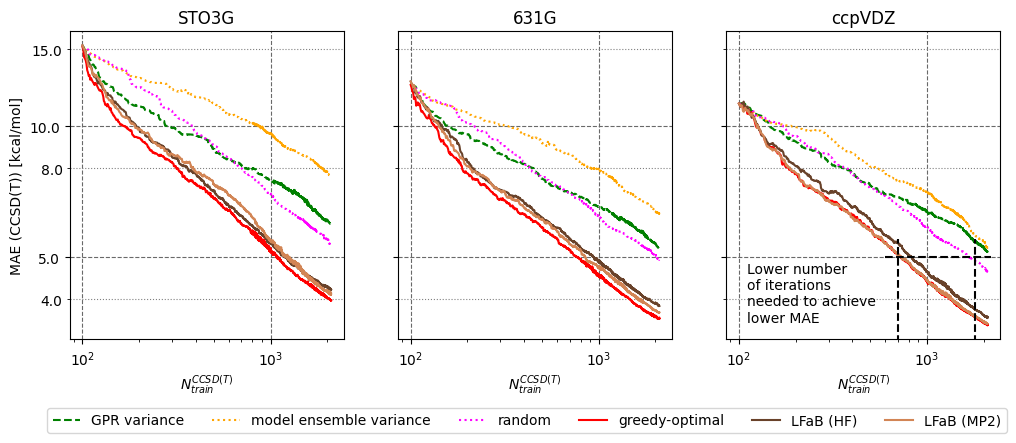

In [30]:
fig,ax = plt.subplots(1,3,sharey=True,sharex=True,figsize=(12,4))
plot_QM7b(ax=ax[0],basis='sto3g')
plot_QM7b(ax=ax[1],basis='631g')
plot_QM7b(ax=ax[2],basis='ccpvdz',highlights=True)
ax[0].set_title('STO3G')
ax[1].set_title('631G')
ax[2].set_title('ccpVDZ')
ax[2].legend([r'GPR variance',
              'model ensemble variance',
              'random',
              'greedy-optimal',
              'LFaB (HF)',
              'LFaB (MP2)'],frameon=True,fontsize=10,ncol=6,bbox_to_anchor=(1.05,-0.2))
ax[0].set_ylabel('MAE (CCSD(T)) [kcal/mol]')


ax[2].text(110, 3.5, 'Lower number\nof iterations\nneeded to achieve\nlower MAE', color='k',
           ha='left', va='bottom')

plt.savefig('updatedplots/QM7b_cross_method_tests.pdf',bbox_inches='tight',format='pdf')

In [33]:
def plot_full_range_QM7b(ax=None,major_ticks=[10,5],minor_ticks=[4,8,15]):
    ax = ax or plt.gca()
    basis = ['sto3g','631g','ccpvdz'][::-1]
    basis_label = ['STO3G','631G','ccpVDZ'][::-1]
    methods = ['HF','MP2','CCSD(T)']
    n_sf = np.load(f'ModelData/sf_QM7b_{basis[0]}_training_size.npy')
    mae_sf = np.load(f'ModelData/sf_QM7b_{basis[0]}_maes.npy')
    
    mae_var = np.load(f'ModelData/var_QM7b_{basis[0]}_maes.npy')
    mae_random = np.load(f'ModelData/random_QM7b_{basis[0]}_maes.npy')

    colors = plt.cm.cividis(np.linspace(0,1,8))#[::2]
    ax.loglog(n_sf,mae_var,label='GPR variance',alpha=1,color='g',linestyle='--')
    ax.loglog(n_sf,mae_random,label='random',alpha=1,color='magenta',linestyle=':')
    ax.loglog(n_sf,mae_sf,label='greedy-optimal',alpha=1,color='r')
    count = 0
    for i in range(3):#loop over methods
        for j in range(3):#loop over basis
            if basis[j]=='ccpvdz' and i==2:
                pass
            else:
                #method 0 in the file is HF, 2 is CCSD(T)
                mae_mf = np.load(f'ModelData/mf_{basis[j]}_{i}_maes.npy')
                ax.loglog(n_sf,mae_mf,
                          # label=r'$\phi_{\mathrm{LoUQ}}^{\mathrm{('+methods[i]+'-'+basis_label[j]+')}}$',
                          label=f'LFaB ({methods[i]}-{basis_label[j]})',
                          color=colors[count],alpha=0.85)
                count += 1
    ax.set_xlabel('$N_{train}^{CCSD(T)-ccpVDZ}$')
    #ax.legend()
    ax.tick_params(axis='y', which='major')
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.1f"))
    ax.set_yticks(major_ticks,minor=False)
    
    ax.tick_params(axis='y', which='minor')
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter("%.1f"))
    ax.set_yticks(minor_ticks,minor=True)
    #ax.set_title(basis)
    ax.grid(which='minor',axis='y',linestyle=':',color='gray')
    ax.grid(which='major',axis='both',linestyle='--',color='dimgray')

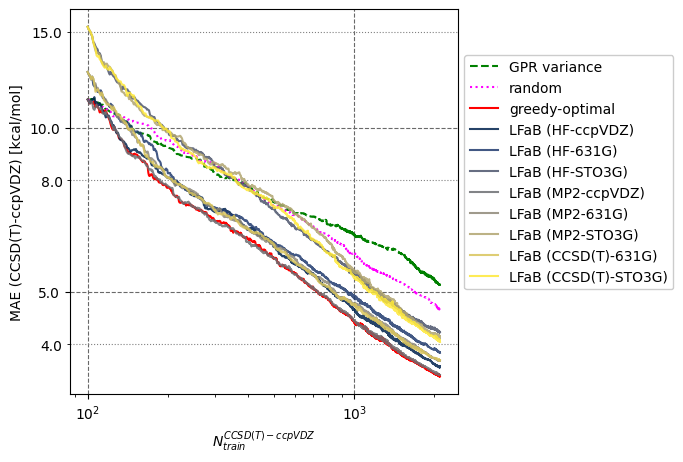

In [34]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
plot_full_range_QM7b()
ax.legend(framealpha=1.0,ncol=1,bbox_to_anchor=(1,0.9))
ax.set_ylabel('MAE (CCSD(T)-ccpVDZ) [kcal/mol]')
plt.savefig('updatedplots/QM7b_ccpvdzccsdt_fullrange.pdf',bbox_inches='tight',format='pdf')

# Ground State PES - VIB5

In [35]:
def plot_VIB5(mol='CH3Cl',multiplier=630,ax=None,major_ticks=[10,5],minor_ticks=[4,8,15]):
    ax = ax or plt.gca()
    n_sf = np.load(f'ModelData/sf_VIB5_{mol}_training_size.npy')
    mae_sf = np.load(f'ModelData/sf_VIB5_{mol}_maes.npy')*multiplier
    
    mae_var = np.load(f'ModelData/var_VIB5_{mol}_maes.npy')*multiplier
    mae_random = np.load(f'ModelData/random_VIB5_{mol}_maes.npy')*multiplier
    mae_ensemble = np.load(f'ModelData/ensemble_VIB5_{mol}_maes.npy')*multiplier
    colors = plt.cm.Blues(np.linspace(0,1,6))
    methods = ['MP2','HF-QZ','HF-TZ']
    methods_label = ['MP2','HF-ccpVQZ','HF-ccpVTZ']

    
    ax.loglog(n_sf,mae_var,label='GPR rariance',alpha=1,color='g',linestyle='--')
    ax.loglog(n_sf,mae_random,label='random',alpha=1,color='magenta',linestyle=':')
    ax.loglog(n_sf,mae_ensemble,label='model ensemble variance',alpha=1,color='orange',linestyle=':')
    ax.loglog(n_sf,mae_sf,label='greedy-optimal',alpha=1,color='r')
    for i in range(len(methods)):
        mae_mf = np.load(f'ModelData/mf_VIB5_{mol}_{methods[i]}_maes.npy')*multiplier
        ax.loglog(n_sf,mae_mf,label='LFaB ('+methods_label[i]+')',color=colors[3+i],alpha=0.85)
    ax.set_ylabel('MAE (CCSD(T)-QZ) [kcal/mol]')
    ax.set_xlabel('$N_{train}^{CCSD(T)-QZ}$')
    #ax.legend()
    ax.tick_params(axis='y', which='major')
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.1f"))
    ax.set_yticks(major_ticks,minor=False)
    
    ax.tick_params(axis='y', which='minor')
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter("%.1f"))
    ax.set_yticks(minor_ticks,minor=True)
    ax.set_title(mol)
    ax.grid(which='minor',axis='y',linestyle=':',color='gray')
    ax.grid(which='major',axis='both',linestyle='--',color='dimgray')

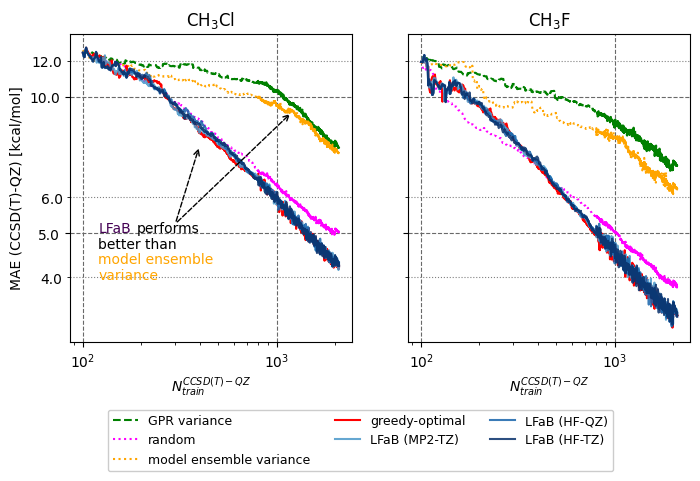

In [93]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(8,4))
plot_VIB5(major_ticks=[5,10],minor_ticks=[4,6,12],ax=ax[0])
plot_VIB5(mol='CH3F',major_ticks=[5,10],minor_ticks=[4,6,12],ax=ax[1])
colors = plt.cm.viridis(np.linspace(0,1,6))
plt.legend(['GPR variance',
            'random',
            'model ensemble variance',
            'greedy-optimal',
            'LFaB (MP2-TZ)',
            'LFaB (HF-QZ)', 
            'LFaB (HF-TZ)'],
           framealpha=1.0,ncol=3,fontsize=9,frameon=True,bbox_to_anchor=(0.75,-0.2))
ax[0].set_title('$\mathrm{CH_3Cl}$')
ax[1].set_title('$\mathrm{CH_3F}$')
ax[1].set_ylabel('')
#####
xytext = (120,4.85)
ax[0].text(xytext[0], xytext[1] + 0.1, 'LFaB', color=colors[0],
           ha='left', va='bottom')
ax[0].text(xytext[0] + 70, xytext[1] + 0.1, 'performs', color='k',
           ha='left', va='bottom')
ax[0].text(xytext[0], xytext[1] - 0.275, 'better than', color='k',
           ha='left', va='bottom')
ax[0].text(xytext[0], xytext[1] - 0.95, 'model ensemble \nvariance', color='orange',
           ha='left', va='bottom')

ax[0].annotate('',
               xy=(400,7.8),
               xytext=(300,5.25),color='k',
               arrowprops=dict(facecolor='k',edgecolor='k',arrowstyle='->',linestyle='--')
              )
ax[0].annotate('',
               xy=(1200,9.25),
               xytext=(300,5.25),color='k',
               arrowprops=dict(facecolor='k',edgecolor='k',arrowstyle='->',linestyle='--')
              )
###
plt.savefig('updatedplots/VIB5.pdf',format='pdf',bbox_inches='tight')

# Excitation Energies - QeMFi

In [59]:
def load_and_plot_results(molname,ax=None,mult=1.0,minor_ticks=[2,4],major_ticks=[1.5,3], legend_show=False):
    n_sf = np.load(f'ModelData/sf_{molname}_EV_training_size.npy')
    n_mf = np.load(f'ModelData/3_mf_{molname}_EV_training_size.npy')
    n_var = np.load(f'ModelData/var_{molname}_EV_training_size.npy')
    n_random = np.load(f'ModelData/random_{molname}_EV_training_size.npy')
    
    sf = np.load(f'ModelData/sf_{molname}_EV_maes.npy')*mult
    mf3 = np.load(f'ModelData/3_mf_{molname}_EV_maes.npy')*mult
    mf2 = np.load(f'ModelData/2_mf_{molname}_EV_maes.npy')*mult
    mf1 = np.load(f'ModelData/1_mf_{molname}_EV_maes.npy')*mult
    mf0 = np.load(f'ModelData/0_mf_{molname}_EV_maes.npy')*mult
    var = np.load(f'ModelData/var_{molname}_EV_maes.npy')*mult
    random = np.load(f'ModelData/random_{molname}_EV_maes.npy')*mult
    mae_ensemble = np.load(f'ModelData/ensemble_{molname}_EV_maes.npy')*mult
    
    ax = ax or plt.gca()
    colors = plt.cm.viridis(np.linspace(0,1,3))
    
    ax.loglog(n_var,var,color='g',linestyle='--')
    ax.loglog(n_var,mae_ensemble,color='orange',linestyle=':')
    ax.loglog(n_random,random,color='magenta',linestyle=':')
    ax.loglog(n_sf,sf,color='r')
    ax.loglog(n_mf,mf3,color=colors[0])
    ax.loglog(n_mf,mf2,color=colors[1])
    ax.loglog(n_mf,mf1,color=colors[2])
    
    ax.tick_params(axis='y', which='major')
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.1f"))
    if type(major_ticks) != type(None):
        ax.set_yticks(major_ticks,minor=False)

    ax.tick_params(axis='y', which='minor')
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter("%.1f"))
    if type(minor_ticks)!=type(None):
        ax.set_yticks(minor_ticks,minor=True)
    ax.grid(which='major',axis='both',linestyle='--',color='lightgray')
    ax.grid(which='minor',axis='y',linestyle=':',color='lightgray')

    if legend_show:
        ax.legend(['GPR-Variance', '5-ensemble',
                'Random',
                'ideal (TZVP)',
                'LoUQ (SVP)',
                'LoUQ (631G)',
                'LoUQ (321G)'], fontsize=9, framealpha=1.0)
        

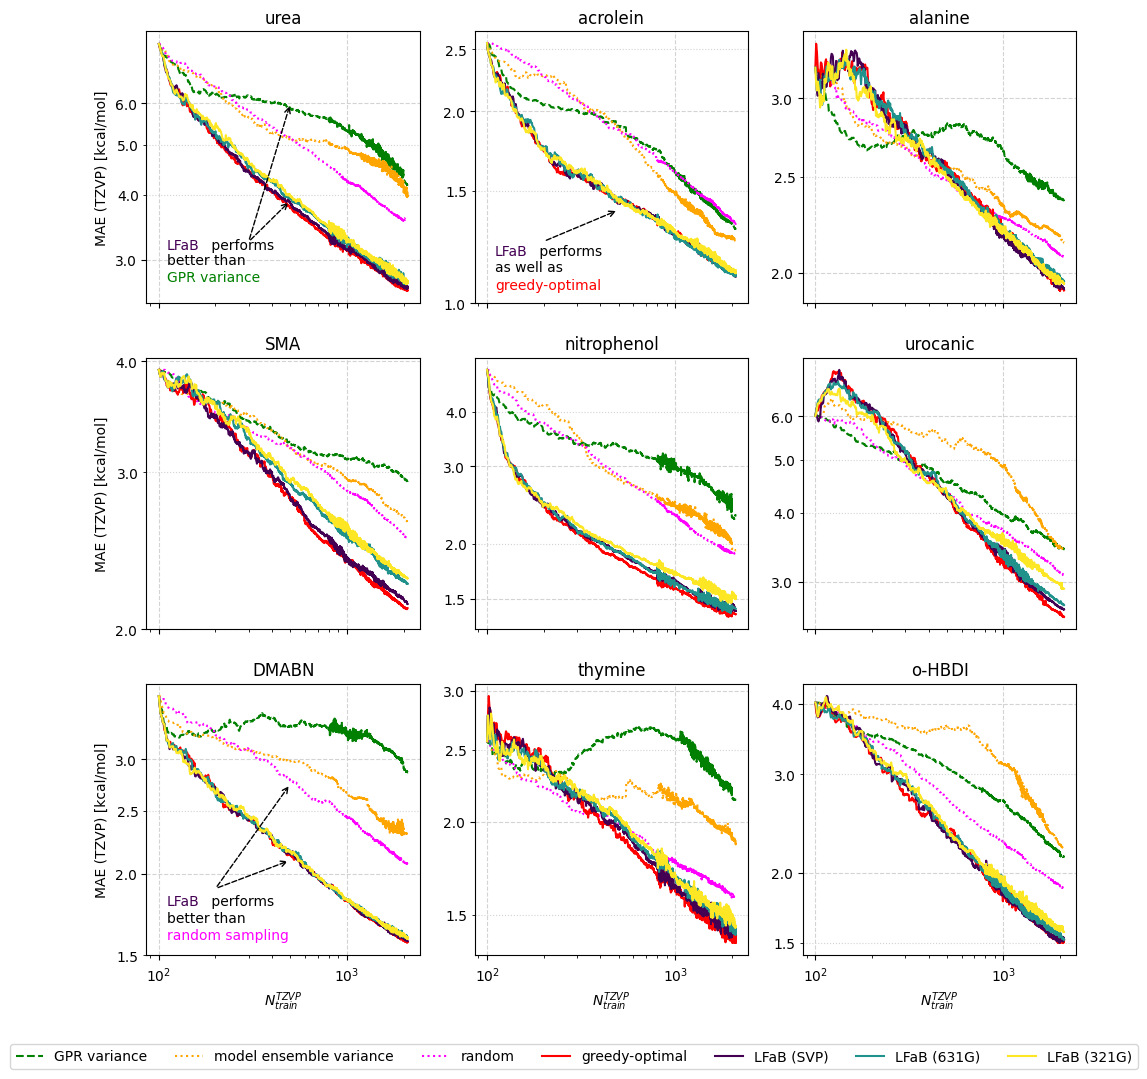

In [70]:
def qemfi_lc():
    colors = plt.cm.viridis(np.linspace(0,1,3))
    fig,ax = plt.subplots(3,3,sharey=False,sharex=True,figsize=(12,12))
    ax = ax.flatten('C')
    mols = ['urea','acrolein','alanine','sma','nitrophenol','urocanic','dmabn','thymine','o-hbdi']
    min_ticks = [[4,5],[1.5,2.5],[2.5],[3],[2,4],[4,5],[1.5,2.5],[1.5,2.5],[1.5,3]]
    maj_ticks = [[3,6],[1,2],[2,3],[2,4],[1.5,3],[3,6],[2,3],[2,3],[2,4]]
    for i,m in enumerate(mols):
        load_and_plot_results(m,ax=ax[i],mult=EV_mult,minor_ticks=min_ticks[i],major_ticks=maj_ticks[i])
        ax[i].set_title(m)
        ax[i].set_ylabel('')
        ax[i].set_xlabel('')
    for i in [0,3,6]:
        ax[i].set_ylabel('MAE (TZVP) [kcal/mol]')
        
    for i in [6,7,8]:
        ax[i].set_xlabel('$N_{train}^{TZVP}$')
    ax[3].set_title('SMA')
    ax[6].set_title('DMABN')
    ax[-1].set_title('o-HBDI')
                
    #custom annotations
    #############
    xytext = (110, 3.)
    xy = (500, 3.9)
    
    ax[0].text(xytext[0], xytext[1] + 0.1, 'LFaB', color=colors[0],
        ha='left', va='bottom')
    ax[0].text(xytext[0] + 70, xytext[1] + 0.1, ' performs', color='k',
            ha='left', va='bottom')
    ax[0].text(xytext[0], xytext[1] - 0.1, 'better than', color='k',
            ha='left', va='bottom')
    ax[0].text(xytext[0], xytext[1] - 0.3, 'GPR variance', color='g',
            ha='left', va='bottom')
    
    ax[0].annotate('',
               xy=(500,6),
               xytext=(300,3.25),color='k',
               arrowprops=dict(facecolor='k',edgecolor='k',arrowstyle='->',linestyle='--'),
              )
    ax[0].annotate('',
               xy=(500,3.9),
               xytext=(300,3.25),color='k',
               arrowprops=dict(facecolor='k',edgecolor='k',arrowstyle='->',linestyle='--'),
              )
    ######
    xytext = (110,1.15)
    ax[1].text(xytext[0], xytext[1]+0.025, 'LFaB', color=colors[0],
        ha='left', va='bottom')
    ax[1].text(xytext[0] + 70, xytext[1] + 0.025, ' performs', color='k',
            ha='left', va='bottom')
    ax[1].text(xytext[0], xytext[1] - 0.04, 'as well as', color='k',
            ha='left', va='bottom')
    ax[1].text(xytext[0], xytext[1] - 0.11, 'greedy-optimal', color='r',
            ha='left', va='bottom')
    ax[1].annotate('',
               xy=(500,1.4),
               xytext=(200,1.25),color='k',
               arrowprops=dict(facecolor='k',edgecolor='k',arrowstyle='->',linestyle='--'),
              )

    ######
    xytext = (110,1.75)
    ax[6].text(xytext[0], xytext[1]+0.025, 'LFaB', color=colors[0],
        ha='left', va='bottom')
    ax[6].text(xytext[0] + 70, xytext[1] + 0.025, ' performs', color='k',
            ha='left', va='bottom')
    ax[6].text(xytext[0], xytext[1] - 0.08, 'better than', color='k',
            ha='left', va='bottom')
    ax[6].text(xytext[0], xytext[1] - 0.175, 'random sampling', color='magenta',
            ha='left', va='bottom')
    ax[6].annotate('',
               xy=(500,2.75),
               xytext=(200,1.9),color='k',
               arrowprops=dict(facecolor='k',edgecolor='k',arrowstyle='->',linestyle='--'),
              )
    ax[6].annotate('',
               xy=(500,2.1),
               xytext=(200,1.9),color='k',
               arrowprops=dict(facecolor='k',edgecolor='k',arrowstyle='->',linestyle='--'),
              )

    ax[-1].legend(['GPR variance', 
                  'model ensemble variance',
                  'random', 
                  'greedy-optimal', 
                  'LFaB (SVP)',
                  'LFaB (631G)', 
                  'LFaB (321G)'], 
                 fontsize=10, frameon=True,ncol=7, bbox_to_anchor=(1.25,-0.3))
qemfi_lc()

plt.savefig('updatedplots/QeMFi_crossbasis_tests.pdf',bbox_inches='tight',format='pdf')

# PCAs

In [74]:
def find_common_and_distinct_indices(arr_a, arr_b):
    """
    Finds common and distinct integer indices between two arrays,
    returning the results as NumPy arrays.

    Args:
        arr_a (list or np.array): The first array of integer indices.
        arr_b (list or np.array): The second array of integer indices.

    Returns:
        tuple: A tuple containing three NumPy arrays of integers:
               (common_indices_np, distinct_in_a_np, distinct_in_b_np)
               - common_indices_np: Indices present in both arr_a and arr_b.
               - distinct_in_a_np: Indices present in arr_a but not in arr_b.
               - distinct_in_b_np: Indices present in arr_b but not in arr_a.
    """
    set_a = set(arr_a)
    set_b = set(arr_b)

    # Perform set operations to get results as sets
    common_indices_set = set_a.intersection(set_b)
    distinct_in_a_set = set_a.difference(set_b)
    distinct_in_b_set = set_b.difference(set_a)

    # Convert each set to a list, then to a NumPy array
    common_indices_np = np.array(list(common_indices_set))
    distinct_in_a_np = np.array(list(distinct_in_a_set))
    distinct_in_b_np = np.array(list(distinct_in_b_set))
    
    return common_indices_np, distinct_in_a_np, distinct_in_b_np

In [96]:
def pca_ch3cl(ax=None,var=False):
    ax = ax or plt.gca()
    import plotly.graph_objects as go
    from sklearn.decomposition import PCA
    from sklearn.utils import shuffle
    from sklearn.model_selection import train_test_split
    X_all = np.load('/home/vvinod/2025/BigDatasets/VIB5/CH3Cl_CM.npy')
    y = np.loadtxt('/home/vvinod/2025/BigDatasets/VIB5/RAWDATA/CH3Cl_CCSD-T.dat')
    
    X_all,y = shuffle(X_all,y,random_state=42)
    X_all = np.copy(X_all[:15000])
    y = np.copy(y[:15000])
    X_all, _,_,_ = train_test_split(X_all,y,random_state=42,train_size=0.9)
    pca = PCA(n_components=2, copy=True, 
              whiten=False, 
              svd_solver='auto', 
              tol=0.0, 
              iterated_power='auto', 
              n_oversamples=10, 
              power_iteration_normalizer='auto', 
              random_state=42)
    X_pca = pca.fit_transform(X_all)
    init_inds = np.load('PlotData/CH3Cl_initial_selected_indexes.npy')
    if var:
        var_inds = np.load('PlotData/Var_CH3Cl_selected_indexes.npy')[:500]
        spec='GPR variance'
    else:
        var_inds = np.load('PlotData/SF_CH3Cl_selected_indexes.npy')[:500]
        spec='greedy-optimal'
    mf_inds = np.load('PlotData/MF_CH3Cl_selected_indexes.npy')[:500]

    X_pca[:,0] = X_pca[:,0]/X_pca[:,0].max()
    X_pca[:,1] = X_pca[:,1]/X_pca[:,1].max()
    a,b,c = find_common_and_distinct_indices(var_inds,mf_inds)
    ax.scatter(X_pca[:,0],X_pca[:,1],s=2,color='lightgray',alpha=0.5,label='Full Dataset')
    ax.scatter(X_pca[a,0],X_pca[a,1],s=8,color='blue',alpha=0.5,label='Common to Both')
    ax.scatter(X_pca[b,0],X_pca[b,1],s=8,color='red',alpha=0.25,label=spec)
    ax.scatter(X_pca[c,0],X_pca[c,1],s=8,color='green',alpha=0.25,label='LFaB')
    #plt.legend()

In [95]:
def pca_qemfi(mol='nitrophenol',ax=None,var=False):
    ax = ax or plt.gca()
    import plotly.graph_objects as go
    from sklearn.decomposition import PCA
    from sklearn.utils import shuffle
    from sklearn.model_selection import train_test_split
    X_all = np.load(f'/home/vvinod/2024/QeMFi/MFML/Reps/{mol}_CM.npy')
    y = np.load(f'/home/vvinod/2024/QeMFi/dataset/QeMFi_{mol}.npz',allow_pickle=True)['EV'][:,-1,0]
    
    X_all,_,_,_ = train_test_split(X_all,y,random_state=42,train_size=0.9)
    pca = PCA(n_components=2, copy=True, 
              whiten=False, 
              svd_solver='auto', 
              tol=0.0, 
              iterated_power='auto', 
              n_oversamples=10, 
              power_iteration_normalizer='auto', 
              random_state=42)
    X_pca = pca.fit_transform(X_all)
    # init_inds = np.load('PlotData/nitrophenol_EV_initial_selected_indexes.npy')
    if var:
        var_inds = np.load(f'PlotData/Var_{mol}_EV_selected_indexes.npy')[:500]
        spec='GPR variance'
    else:
        var_inds = np.load(f'PlotData/SF_{mol}_EV_selected_indexes.npy')[:500]
        spec = 'greedy-optimal'
    mf_inds = np.load(f'PlotData/MF_{mol}_EV_selected_indexes.npy')[:500]

    a,b,c = find_common_and_distinct_indices(var_inds,mf_inds)
    X_pca[:,0] = X_pca[:,0]/X_pca[:,0].max()
    X_pca[:,1] = X_pca[:,1]/X_pca[:,1].max()
    ax.scatter(X_pca[:,0],X_pca[:,1],s=2,color='lightgray',alpha=0.5,label='Full Dataset')
    ax.scatter(X_pca[a,0],X_pca[a,1],s=8,color='blue',alpha=0.5,label='Common to Both')
    ax.scatter(X_pca[b,0],X_pca[b,1],s=8,color='red',alpha=0.25,label=spec)
    ax.scatter(X_pca[c,0],X_pca[c,1],s=8,color='green',alpha=0.25,label='LFaB')
    #plt.legend()

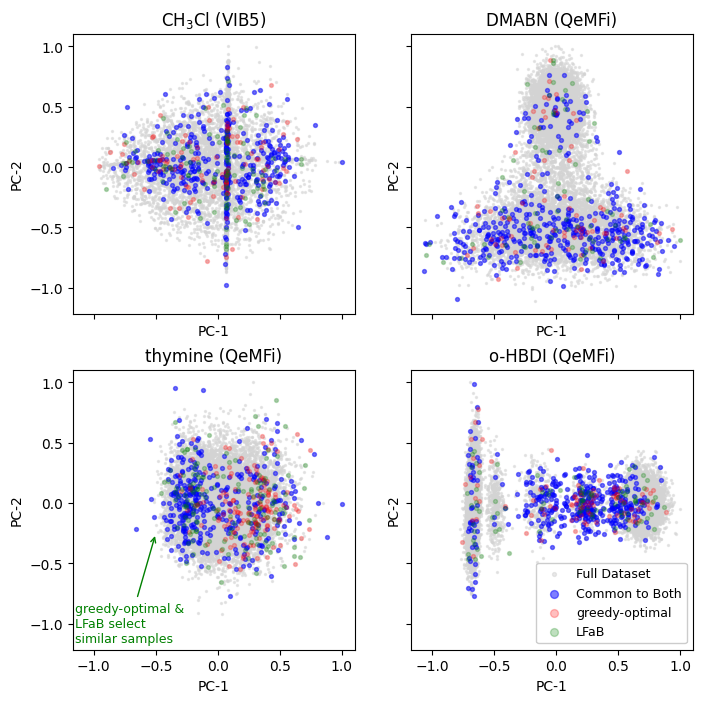

In [97]:
fig,ax = plt.subplots(2,2,figsize=(8,8),sharey=True,sharex=True)
ax = ax.flatten('C')
pca_ch3cl(ax=ax[0])
pca_qemfi(mol='dmabn',ax=ax[1])
pca_qemfi(mol='thymine',ax=ax[2])
pca_qemfi(mol='o-hbdi',ax=ax[3])
ax[0].set_title('$\mathrm{CH_3Cl}$ (VIB5)')
ax[1].set_title('DMABN (QeMFi)')
ax[2].set_title('thymine (QeMFi)')
ax[3].set_title('o-HBDI (QeMFi)')
for i in range(4):
    ax[i].set_xlabel('PC-1')
    ax[i].set_ylabel('PC-2')
ax[-1].legend(framealpha=1.0,markerscale=2.0,fontsize=9)
ax[2].annotate('greedy-optimal'+ ' &\n'+'LFaB'+ ' select\nsimilar samples',
               xy=(-0.5,-0.25),
               xytext=(-1.15,-1.15),fontsize=9, color='g',
               arrowprops=dict(facecolor='g',edgecolor='g',arrowstyle='->'),
              )
plt.savefig('updatedplots/SF_MF_Combined_pca.png',format='png',bbox_inches='tight',dpi=250.0)


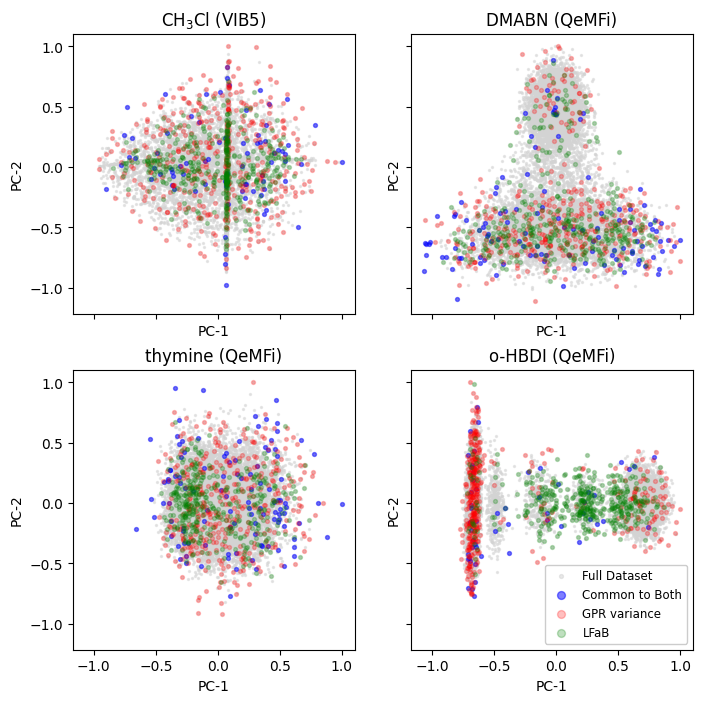

In [98]:
fig,ax = plt.subplots(2,2,figsize=(8,8),sharey=True,sharex=True)
ax = ax.flatten('C')
pca_ch3cl(ax=ax[0],var=True)
pca_qemfi(mol='dmabn',ax=ax[1],var=True)
pca_qemfi(mol='thymine',ax=ax[2],var=True)
pca_qemfi(mol='o-hbdi',ax=ax[3],var=True)
ax[0].set_title('$\mathrm{CH_3Cl}$ (VIB5)')
ax[1].set_title('DMABN (QeMFi)')
ax[2].set_title('thymine (QeMFi)')
ax[3].set_title('o-HBDI (QeMFi)')
for i in range(4):
    ax[i].set_xlabel('PC-1')
    ax[i].set_ylabel('PC-2')
ax[-1].legend(framealpha=1.0,markerscale=2.0,fontsize=8.5)

plt.savefig('updatedplots/Combined_pca.png',format='png',bbox_inches='tight',dpi=250.0)


# Calibration Curves

In [86]:
def mae_vs_uncertainty_twin_x_with_colorbar(mol='dmabn', multiplier=0.0029, ax=None,show_cbar=False):
    plt.style.use('default')
    if ax is None:
        fig, ax1 = plt.subplots(figsize=(5, 5))  # Adjusted figure size for better aspect ratio
    else:
        ax1 = ax
        fig = ax.figure

    # Load data
    mf_uncert = np.load(f'ModelData/1_mf_{mol}_EV_highest_diff.npy') * multiplier #because in units of energy
    var_uncert = np.load(f'ModelData/var_{mol}_EV_highest_diff.npy')
    mae_mf = np.load(f'ModelData/1_mf_{mol}_EV_maes.npy') * multiplier
    mae_var = np.load(f'ModelData/var_{mol}_EV_maes.npy') * multiplier
    
    iterations_mf = np.arange(0, 2000)
    iterations_var = np.arange(0, 2000)
    
    # Define colormaps
    cmap1 = plt.cm.viridis
    cmap2 = plt.cm.cool
    
    scatter1 = ax1.scatter(mae_mf,mf_uncert/mf_uncert.max(), marker='o', alpha=1, 
                           c=iterations_mf, cmap=cmap1, label='LFaB',edgecolor='darkblue', linewidths=0.2)
    ax1.set_ylabel('Normalized LFaB', color='darkgreen')
    ax1.tick_params(axis='y', labelcolor='darkgreen')
    ax1.set_xlabel('MAE [kcal/mol]')
    

    # Create a twin X-axis that shares the same Y-axis
    ax2 = ax1.twinx()
    # Plot GPR-Variance on the twin X-axis (ax2)
    scatter2 = ax2.scatter(mae_var,var_uncert/var_uncert.max(), marker='s', alpha=0.24, 
                           c=iterations_var, cmap=cmap2, label='GPR variance',edgecolor='darkblue', linewidths=0.2
                           )
    ax2.set_ylabel('Normalized GPR variance', color='firebrick')
    ax2.tick_params(axis='y', labelcolor='firebrick')
    
    if show_cbar:
        cax1 = ax1.inset_axes([0.1, 0.8, 0.4, 0.03], transform=ax1.transAxes)
        cbar1 = fig.colorbar(scatter1, cax=cax1, orientation='horizontal')
        cbar1.set_label('LFaB iteration')
    
        # Create the second vertical colorbar next to the first one
        cax2 = ax1.inset_axes([0.1, 0.6, 0.4, 0.03], transform=ax1.transAxes)
        cbar2 = fig.colorbar(scatter2, cax=cax2, orientation='horizontal')
        cbar2.set_label('GPR variance iteration')

        cbar1.set_ticks([0, 1000, 2000])
        cbar2.set_ticks([0, 1000, 2000])

    if ax is None:
        plt.show()

In [87]:
def mae_vs_uncertainty_twin_x_with_colorbar_VIB5(mol='CH3Cl', method='MP2',
                                                 multiplier=630.0, ax=None, show_cbar=True):
    plt.style.use('default')
    if ax is None:
        fig, ax1 = plt.subplots(figsize=(5, 5))  # Adjusted figure size for better aspect ratio
    else:
        ax1 = ax
        fig = ax.figure

    # Load data 
    mf_uncert = np.load(f'ModelData/mf_VIB5_{mol}_{method}_highest_diff.npy') * multiplier
    var_uncert = np.load(f'ModelData/var_VIB5_{mol}_highest_diff.npy')
    mae_mf = np.load(f'ModelData/mf_VIB5_{mol}_{method}_maes.npy') * multiplier
    mae_var = np.load(f'ModelData/var_VIB5_{mol}_maes.npy') * multiplier
    
    iterations_mf = np.arange(0, 2000)
    iterations_var = np.arange(0, 2000)
    
    # Define colormaps
    cmap1 = plt.cm.viridis
    cmap2 = plt.cm.cool
    #ax1.set_axisbelow(True)
    # Plot LoFiAL on the primary axes (ax1)
    scatter1 = ax1.scatter(mae_mf,mf_uncert/mf_uncert.max(), marker='o', alpha=1, 
                           c=iterations_mf, cmap=cmap1, label='LFaB',edgecolor='darkblue', linewidths=0.2)
    ax1.set_ylabel('Normalized LFaB Uncertainty', color='darkgreen')
    ax1.tick_params(axis='y', labelcolor='darkgreen')
    ax1.set_xlabel('MAE [kcal/mol]')
    

    # Create a twin X-axis that shares the same Y-axis
    ax2 = ax1.twinx()
    # Plot GPR-Variance on the twin X-axis (ax2)
    scatter2 = ax2.scatter(mae_var,var_uncert/var_uncert.max(), marker='s', alpha=0.24, 
                           c=iterations_var, cmap=cmap2, label='GPR variance',edgecolor='darkblue', linewidths=0.2)
    ax2.set_ylabel('Normalized GPR variance', color='firebrick')
    ax2.tick_params(axis='y', labelcolor='firebrick')
    
    if show_cbar:
        cax1 = ax1.inset_axes([0.1, 0.8, 0.4, 0.03], transform=ax1.transAxes)
        cbar1 = fig.colorbar(scatter1, cax=cax1, orientation='horizontal')
        cbar1.set_label('LFaB iteration')
    
        # Create the second vertical colorbar next to the first one
        cax2 = ax1.inset_axes([0.1, 0.6, 0.4, 0.03], transform=ax1.transAxes)
        cbar2 = fig.colorbar(scatter2, cax=cax2, orientation='horizontal')
        cbar2.set_label('GPR variance iteration')

        cbar1.set_ticks([0, 1000, 2000])
        cbar2.set_ticks([0, 1000, 2000])

    if ax is None:
        plt.show()

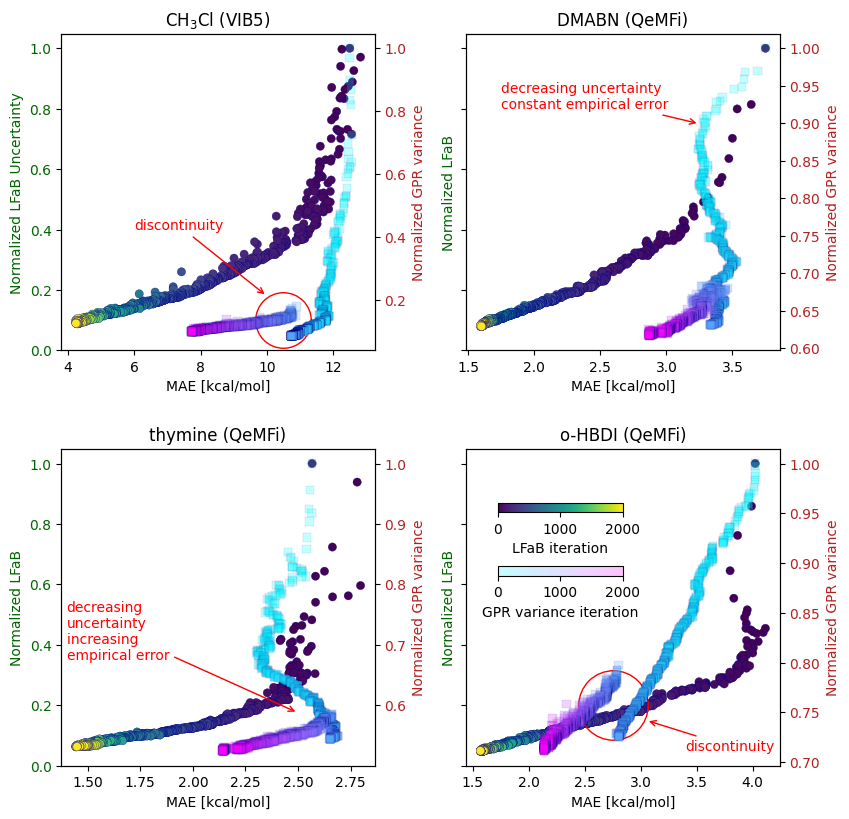

In [80]:
fig,ax = plt.subplots(2,2,figsize=(9,9),sharey=True)
ax = ax.flatten('C')
fig.tight_layout(pad=5)
mae_vs_uncertainty_twin_x_with_colorbar_VIB5('CH3Cl',ax=ax[0],show_cbar=False,method='HF-TZ')
mae_vs_uncertainty_twin_x_with_colorbar('dmabn',show_cbar=False,ax=ax[1])
mae_vs_uncertainty_twin_x_with_colorbar('thymine',show_cbar=False,ax=ax[2])
mae_vs_uncertainty_twin_x_with_colorbar('o-hbdi',show_cbar=True,ax=ax[3])


ax[0].set_title('$\mathrm{CH_3Cl}$ (VIB5)')
ax[1].set_title('DMABN (QeMFi)')
ax[2].set_title('thymine (QeMFi)')
ax[3].set_title('o-HBDI (QeMFi)')


#annotations
ax[0].plot(10.5, 0.1, marker='o', markersize=40, mfc='none', linestyle='None',
        mec='red', mew=1, dashes=[6, 2])
#ax[0].text(7.5,0.03,'discontinuity',color='r',fontsize=9)
ax[0].annotate('discontinuity',
               xy=(10,0.18),
               xytext=(6,0.4),color='r',
               arrowprops=dict(facecolor='r',edgecolor='r',arrowstyle='->'),
              )
ax[1].annotate('decreasing uncertainty\nconstant empirical error',
               xy=(3.25,0.75),
               xytext=(1.75,0.8),color='r',
               arrowprops=dict(facecolor='r',edgecolor='r',arrowstyle='->'),
              )
ax[2].annotate('decreasing\nuncertainty\nincreasing \nempirical error',
               xy=(2.5,0.175),
               xytext=(1.4,0.35), color='r',
               arrowprops=dict(facecolor='r',edgecolor='r',arrowstyle='->'),
              )

ax[3].plot(2.75, 0.2, marker='o', markersize=50, mfc='none', linestyle='None',
        mec='red', mew=1, dashes=[6, 2])
ax[3].annotate('discontinuity',
               xy=(3.05,0.15),
               xytext=(3.4,0.05),color='r',
               arrowprops=dict(facecolor='r',edgecolor='r',arrowstyle='->'),
              )

plt.savefig('updatedplots/Calibration_combined.png',format='png',bbox_inches='tight',dpi=250.0)

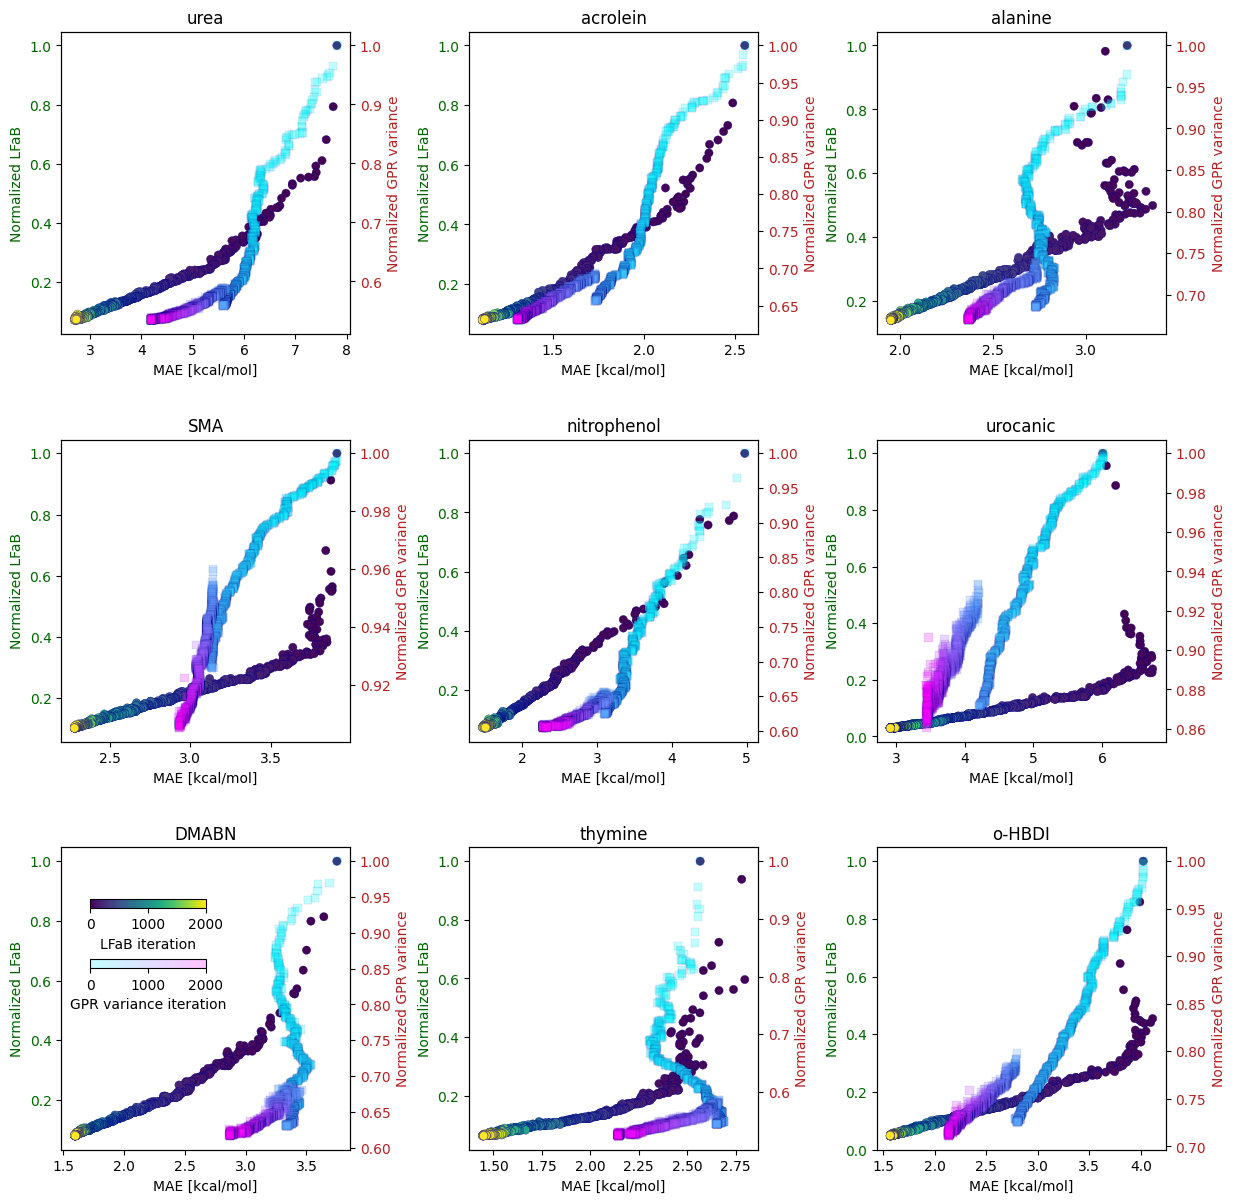

In [92]:
fig,ax = plt.subplots(3,3,sharey=False,sharex=False,figsize=(13,13))
fig.tight_layout(pad=5.5)
ax = ax.flatten('C')
mols = ['urea','acrolein','alanine','sma','nitrophenol','urocanic','dmabn','thymine','o-hbdi']
for i in range(9):
    if i==6:
        mae_vs_uncertainty_twin_x_with_colorbar(mols[i],ax=ax[i],show_cbar=True)
    else:
        mae_vs_uncertainty_twin_x_with_colorbar(mols[i],ax=ax[i],show_cbar=False)
    ax[i].set_title(mols[i])

# for ii in [0,3,6]:
#     ax[ii].set_ylabel('Normalized GPR variance', color='firebrick')
    
# for ii in [6,7,8]:
#     ax[ii].set_ylabel('Normalized LFaB Uncertainty', color='darkgreen')
    
ax[3].set_title('SMA')
ax[6].set_title('DMABN')
ax[-1].set_title('o-HBDI')
plt.savefig('updatedplots/QeMFi_all_callibrations.png',format='png',dpi=250,bbox_inches='tight')